# Olasılık ve İstatistiğe Giriş
Bu not defterinde, daha önce tartıştığımız bazı kavramlarla ilgili pratik yapacağız. Olasılık ve istatistikle ilgili birçok kavram, Python'daki `numpy` ve `pandas` gibi veri işleme için kullanılan büyük kütüphanelerde iyi bir şekilde temsil edilmektedir.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Rastgele Değişkenler ve Dağılımlar
0 ile 9 arasında bir uniform dağılımdan 30 değerlik bir örnek alarak başlayalım. Ayrıca ortalama ve varyansı hesaplayacağız.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Örneklemde kaç farklı değer olduğunu görsel olarak tahmin etmek için, **histogramı** çizebiliriz:


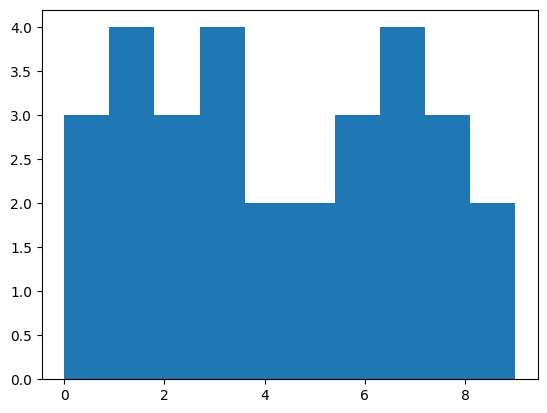

In [119]:
plt.hist(sample)
plt.show()

## Gerçek Verileri Analiz Etmek

Gerçek dünya verilerini analiz ederken ortalama ve varyans çok önemlidir. Hadi beyzbol oyuncuları hakkındaki verileri [SOCR MLB Boy/Kilo Verisi](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) adresinden yükleyelim.


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Burada veri analizi için [**Pandas**](https://pandas.pydata.org/) adlı bir paket kullanıyoruz. Bu kursun ilerleyen bölümlerinde Pandas ve Python ile veri üzerinde çalışmayı daha detaylı ele alacağız.

Hadi yaş, boy ve kilo için ortalama değerleri hesaplayalım:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Şimdi boy uzunluğuna odaklanalım ve standart sapma ile varyansı hesaplayalım:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Ortalamaya ek olarak, medyan değere ve çeyrekliklere bakmak mantıklıdır. Bunlar bir **kutu grafiği** kullanılarak görselleştirilebilir:


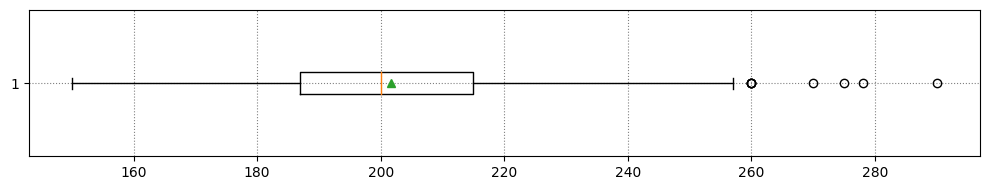

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Veri setimizin alt kümelerinin kutu grafiğini de oluşturabiliriz, örneğin, oyuncu rolüne göre gruplandırılmış olarak.


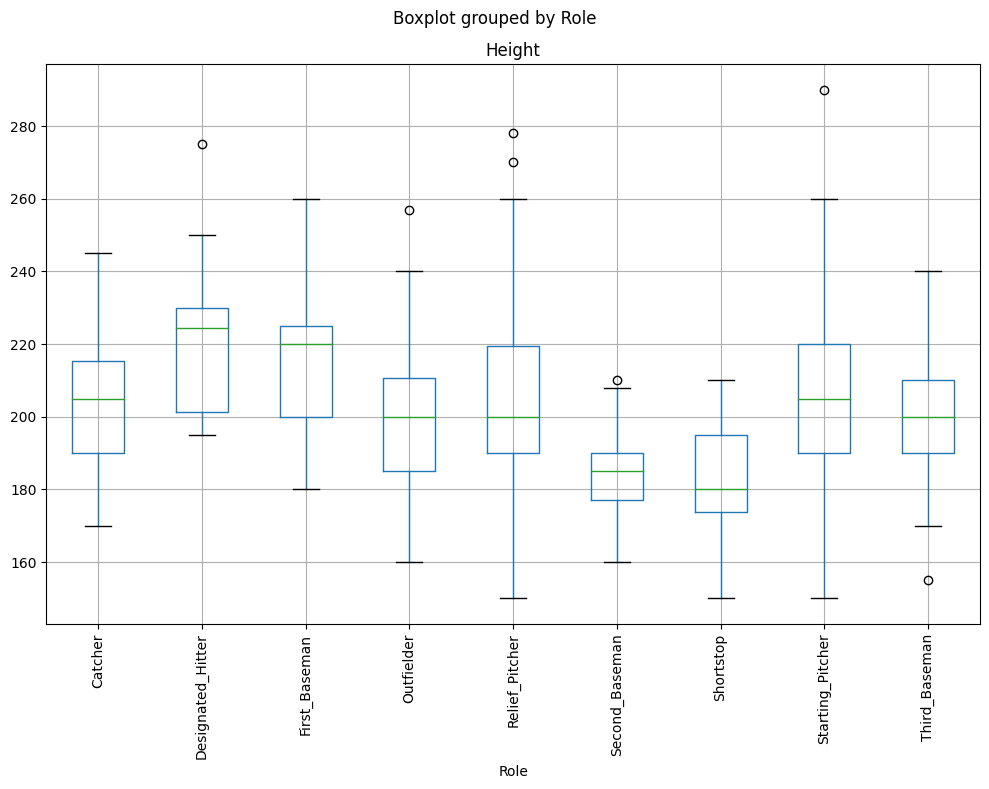

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Not**: Bu diyagram, ortalama olarak birinci kalecilerin boylarının ikinci kalecilerin boylarından daha uzun olduğunu öne sürüyor. Daha sonra bu hipotezi daha resmi bir şekilde nasıl test edebileceğimizi ve verilerimizin bunu göstermek için istatistiksel olarak anlamlı olduğunu nasıl kanıtlayabileceğimizi öğreneceğiz.

Yaş, boy ve kilo, hepsi sürekli rastgele değişkenlerdir. Sizce bunların dağılımı nedir? Bunu öğrenmenin iyi bir yolu, değerlerin histogramını çizmektir:


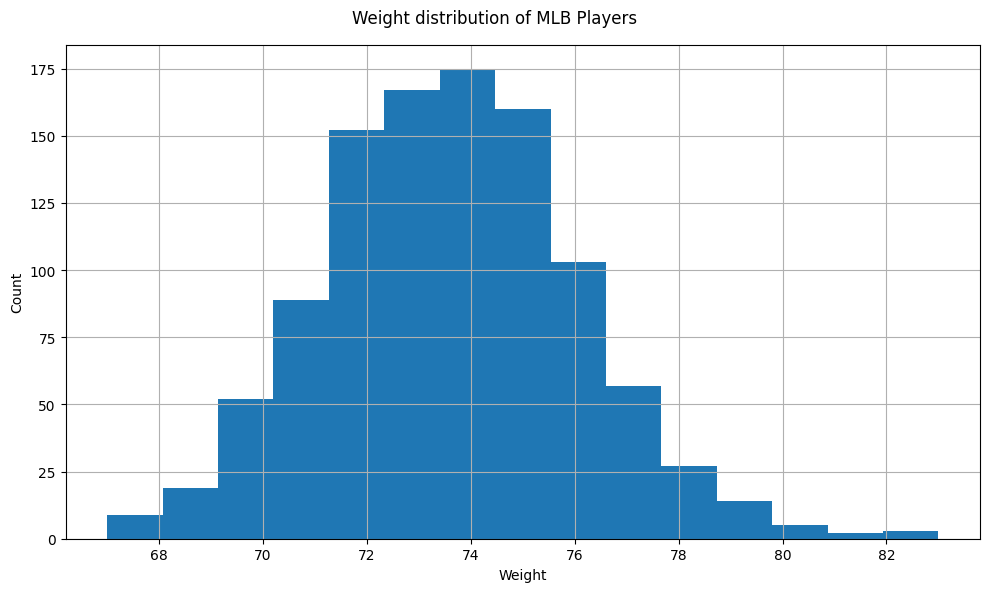

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normal Dağılım

Gerçek verilerimizle aynı ortalama ve varyansa sahip, normal dağılıma uyan yapay bir ağırlık örneği oluşturalım:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

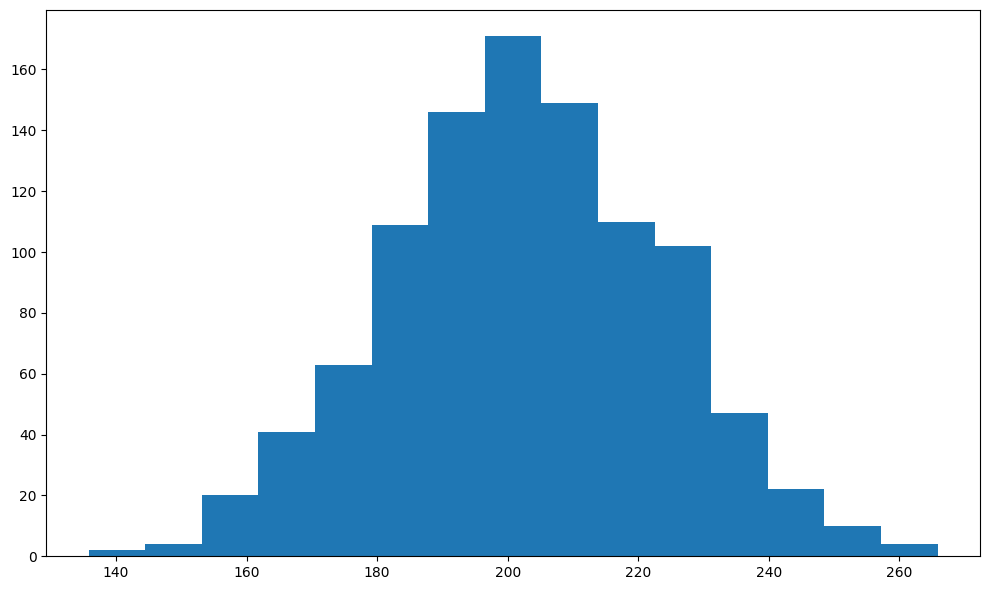

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

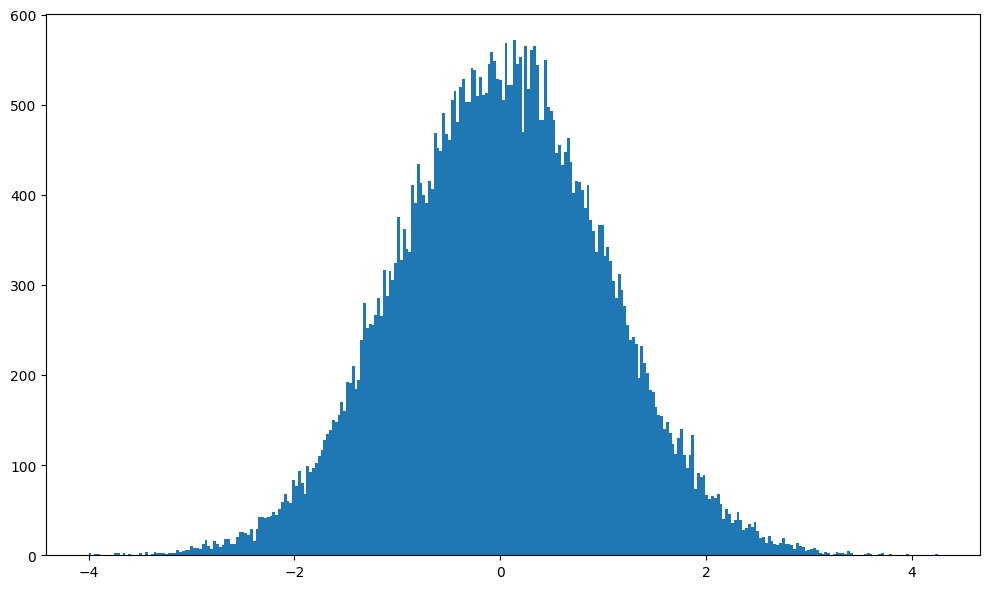

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Gerçek hayattaki çoğu değer normal dağılıma sahip olduğundan, örnek veri oluşturmak için uniform bir rastgele sayı üreteci kullanmamalıyız. İşte ağırlıkları uniform bir dağılımla (örneğin `np.random.rand` ile) oluşturmaya çalışırsak ne olur:


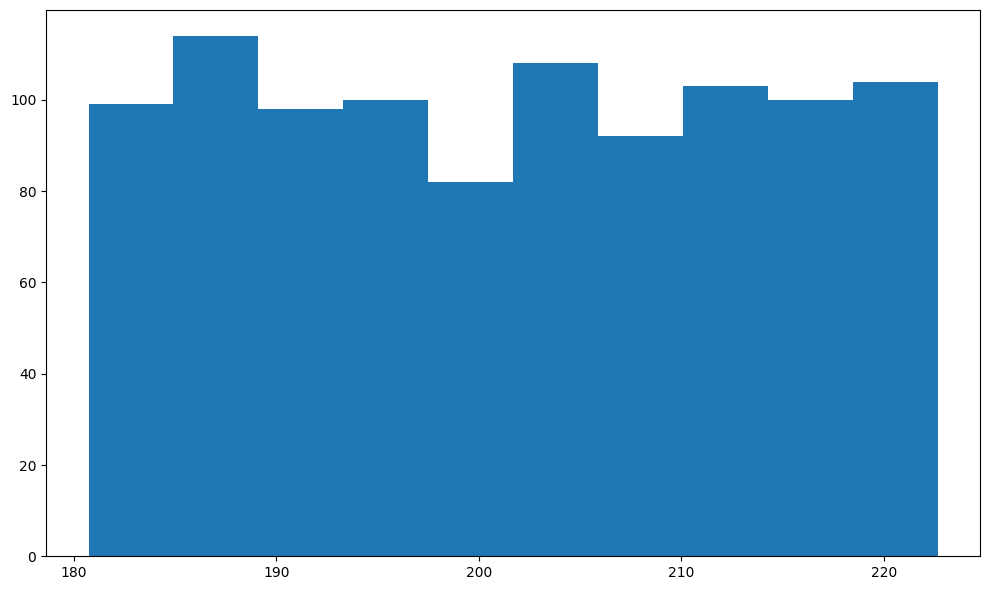

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Güven Aralıkları

Şimdi beyzbol oyuncularının ağırlıkları ve boyları için güven aralıklarını hesaplayalım. [Bu stackoverflow tartışmasındaki](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) kodu kullanacağız:


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hipotez Testi

Beyzbol oyuncuları veri setimizdeki farklı rolleri inceleyelim:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Aralıkların çakışmadığını görebiliyoruz.

Hipotezi kanıtlamak için istatistiksel olarak daha doğru bir yöntem, **Student t-testi** kullanmaktır:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` fonksiyonunun döndürdüğü iki değer şunlardır:  
* p-değeri, iki dağılımın aynı ortalamaya sahip olma olasılığı olarak düşünülebilir. Bizim durumumuzda, bu değer oldukça düşüktür, bu da birinci kalecilerin daha uzun olduğuna dair güçlü bir kanıt olduğunu gösterir.  
* t-değeri, t-testinde kullanılan normalize edilmiş ortalama farkının ara değeridir ve belirli bir güven seviyesi için bir eşik değeriyle karşılaştırılır.  


## Merkezi Limit Teoremi ile Normal Dağılımı Simüle Etmek

Python'daki sahte rastgele sayı üreteci, bize uniform bir dağılım sağlar. Eğer normal dağılım için bir üreteç oluşturmak istiyorsak, merkezi limit teoremini kullanabiliriz. Normal dağılım gösteren bir değer elde etmek için, uniform olarak üretilmiş bir örneklemin ortalamasını hesaplayacağız.


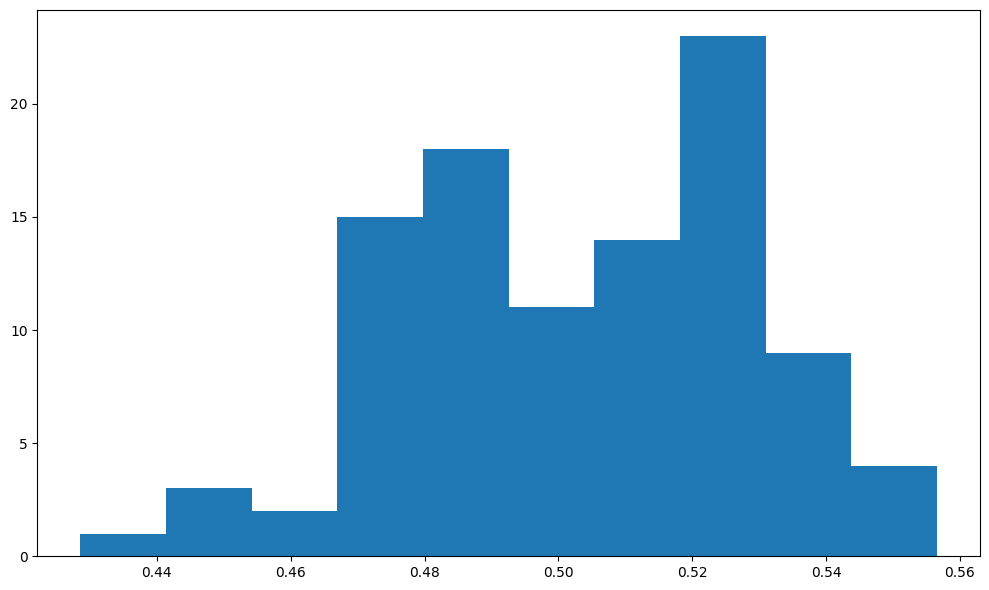

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelasyon ve Kötü Beyzbol Şirketi

Korelasyon, veri dizileri arasındaki ilişkileri bulmamıza olanak tanır. Oyuncak örneğimizde, oyuncularına boylarına göre ödeme yapan kötü bir beyzbol şirketi olduğunu varsayalım - oyuncu ne kadar uzun boyluysa, o kadar fazla para alır. Diyelim ki temel maaş $1000 ve boya bağlı olarak $0 ile $100 arasında ek bir bonus var. Gerçek MLB oyuncularını alacağız ve hayali maaşlarını hesaplayacağız:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Haydi şimdi bu dizilerin kovaryansını ve korelasyonunu hesaplayalım. `np.cov` bize **kovaryans matrisi** olarak adlandırılan bir matris verecektir, bu da kovaryansın birden fazla değişkene genişletilmiş halidir. Kovaryans matrisi $M$'nin $M_{ij}$ elemanı, giriş değişkenleri $X_i$ ve $X_j$ arasındaki korelasyonu ifade eder ve köşegen değerler $M_{ii}$, $X_{i}$'nin varyansıdır. Benzer şekilde, `np.corrcoef` bize **korelasyon matrisi** verecektir.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


1'e eşit bir korelasyon, iki değişken arasında güçlü bir **doğrusal ilişki** olduğu anlamına gelir. Bir değeri diğerine karşı çizerek doğrusal ilişkiyi görsel olarak görebiliriz:


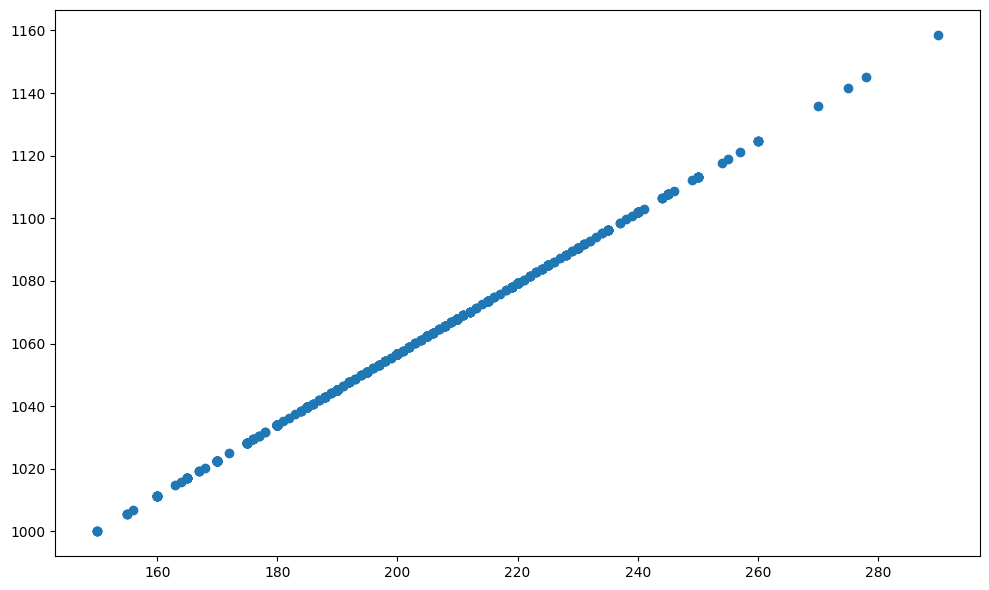

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Haydi ilişkinin doğrusal olmadığı durumda ne olacağını görelim. Diyelim ki şirketimiz, yükseklikler ve maaşlar arasındaki bariz doğrusal bağımlılığı gizlemeye karar verdi ve formüle `sin` gibi bir doğrusal olmayanlık ekledi:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Bu durumda, korelasyon biraz daha küçük, ancak yine de oldukça yüksek. Şimdi, ilişkiyi daha az belirgin hale getirmek için maaşa bazı rastgele değişkenler ekleyerek biraz daha rastgelelik eklemek isteyebiliriz. Bakalım ne oluyor:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


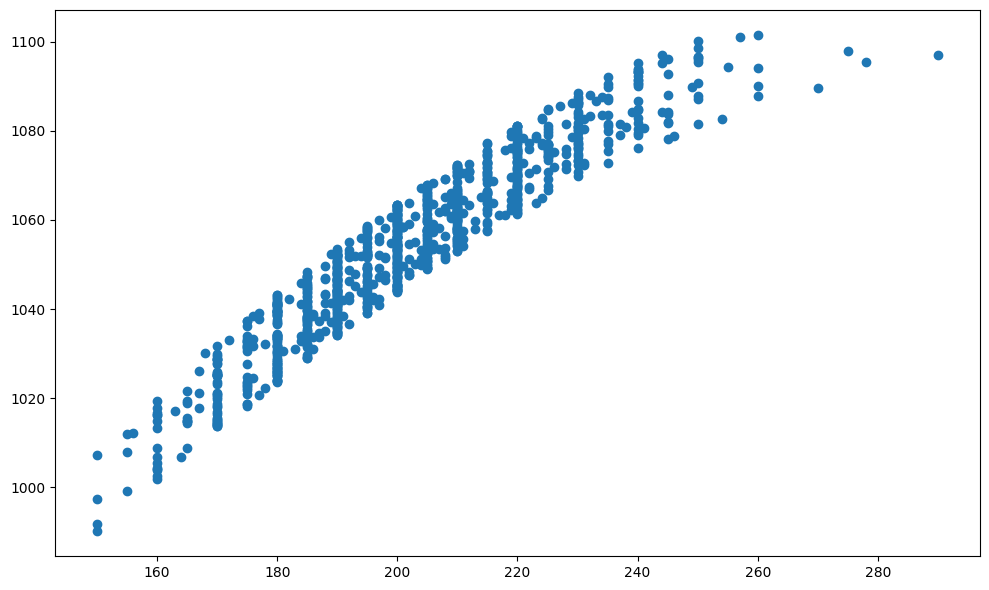

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Noktaların neden bu şekilde dikey çizgiler halinde sıralandığını tahmin edebilir misiniz?

Maaş gibi yapay olarak tasarlanmış bir kavram ile gözlemlenen değişken *boy* arasındaki ilişkiyi gözlemledik. Şimdi de iki gözlemlenen değişken, boy ve kilo arasında bir ilişki olup olmadığını görelim:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Ne yazık ki herhangi bir sonuç elde edemedik - sadece garip `nan` değerleri aldık. Bunun nedeni, serimizdeki bazı değerlerin tanımsız olması ve `nan` olarak temsil edilmesidir. Bu da işlemin sonucunun tanımsız olmasına yol açar. Matrisi incelediğimizde, `Weight` sütununun sorunlu olduğunu görebiliriz, çünkü `Height` değerleri arasındaki öz-korelasyon hesaplanmış durumda.

> Bu örnek, **veri hazırlama** ve **temizleme**nin önemini göstermektedir. Doğru veri olmadan hiçbir şey hesaplayamayız.

Hadi eksik değerleri doldurmak için `fillna` metodunu kullanalım ve korelasyonu hesaplayalım:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

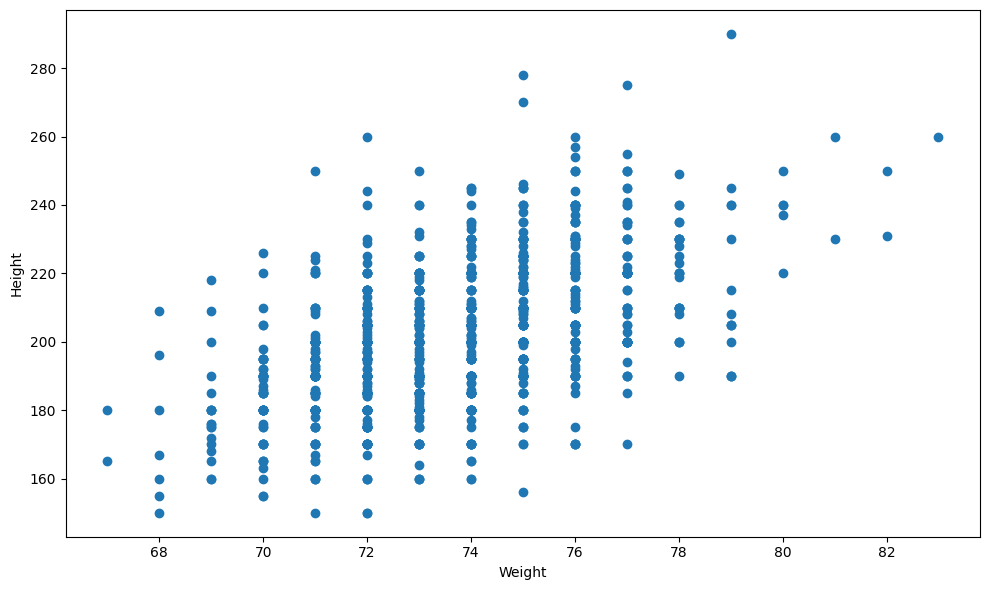

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Sonuç

Bu not defterinde, veriler üzerinde temel işlemleri gerçekleştirerek istatistiksel fonksiyonları hesaplamayı öğrendik. Artık bazı hipotezleri kanıtlamak için sağlam bir matematik ve istatistik araç setini nasıl kullanacağımızı ve bir veri örneği verildiğinde rastgele değişkenler için güven aralıklarını nasıl hesaplayacağımızı biliyoruz.



---

**Feragatname**:  
Bu belge, [Co-op Translator](https://github.com/Azure/co-op-translator) adlı yapay zeka çeviri hizmeti kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlıklar içerebileceğini lütfen unutmayın. Belgenin orijinal dili, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan yanlış anlama veya yanlış yorumlamalardan sorumlu değiliz.
